# Figure 3 computational performance plots

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.11.2)


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
DIR = 'HZV09-figures/'
asari_table = pd.read_csv(DIR + "preferred_Feature_table.tsv", index_col=0, header=0, sep='\t')
asari_table

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,...,batch9_MT_20210803_003K,batch9_MT_20210803_007,batch9_MT_20210803_051,batch9_MT_20210803_087,batch9_MT_20210803_089,batch9_MT_20210803_091,batch9_MT_20210803_139,batch9_MT_20210803_181,batch9_MT_20210803_183,batch9_MT_20210803_185
id_number,,,,,,,,,,,,,,,,,,,,,
F1,80.0497,18.16,16.63,31.19,13,8247874,1.00,0.91,130,85,...,0,0,0,0,0,0,0,0,0,0
F2,80.0497,153.21,147.71,157.17,13,2185381,0.77,0.80,18,88,...,0,0,0,0,0,0,0,0,0,0
F4,80.9478,111.08,105.86,122.16,17,21242809,1.00,0.93,222,164,...,186381,61434,79207,161132,158684,125496,134760,163748,160744,179105
F5,80.9478,133.32,122.16,135.69,17,53018429,1.00,0.94,418,164,...,183476,29601,33701,118453,104557,80976,55289,90266,135409,111682
F7,80.9478,166.39,162.12,168.75,17,8244467,1.00,0.88,111,149,...,16324,15746,20812,0,0,28406,24329,16674,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F28612,650.5358,14.37,7.41,21.23,18660,487659693,1.00,1.00,15913,118,...,8506806,0,0,6921839,3381931,0,2288815,0,6544150,6732551
F28613,650.5961,71.04,68.80,73.28,18661,1872938,1.00,0.84,19,6,...,0,0,0,0,0,0,0,0,0,0
F28614,650.5961,75.88,73.28,78.53,18661,5495814,1.00,0.94,31,10,...,0,0,0,0,0,0,0,0,0,0


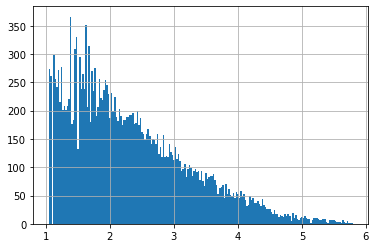

In [4]:
np.log10(asari_table['snr']).hist(bins=200)

In [5]:
snr3 = asari_table[asari_table['snr'] > 1000]
snr3.shape

(4746, 278)

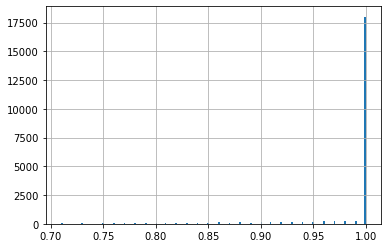

In [6]:
asari_table['cSelectivity'].hist(bins=200)

In [7]:
snr3[snr3['cSelectivity']<0.9].shape

(33, 278)

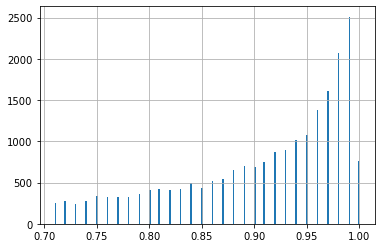

In [8]:
asari_table['goodness_fitting'].hist(bins=200)

In [9]:
asari_table[asari_table['snr']>1e4].shape

(1342, 278)

In [10]:
top = asari_table[asari_table['snr']>1e4][asari_table['goodness_fitting']>0.95][asari_table['cSelectivity']>0.99]
top.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1005, 278)

In [11]:
asari_table[asari_table['snr']>60][asari_table['goodness_fitting'] > 0.9].shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(10292, 278)

In [12]:
fil_data = asari_table[asari_table['snr'] < 100][asari_table['goodness_fitting'] > 0.9]
fil_data.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(3822, 278)

In [13]:
#medium = fil_data[fil_data['snr']>60]
medium = snr3[snr3['goodness_fitting']<0.95]


medium.shape

(1187, 278)

In [14]:
fil_data.columns[:20]

Index(['mz', 'rtime', 'rtime_left_base', 'rtime_right_base',
       'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting',
       'snr', 'detection_counts', 'batch11_MT_20210805_001',
       'batch10_MT_20210804_001', 'batch10_MT_20210804_001A',
       'batch10_MT_20210804_001E', 'batch10_MT_20210804_001I',
       'batch10_MT_20210804_003', 'batch10_MT_20210804_003C',
       'batch10_MT_20210804_003G', 'batch10_MT_20210804_003K',
       'batch10_MT_20210804_007'],
      dtype='object')

In [15]:
wanted = [fil_data.columns[ii*5] for ii in range(18, 50)]
print(len(wanted))


32


In [16]:


def plot_corr_heatmap(new_data, figsize=(6,6), fname="corr_heatmap.pdf"):
    full_corr = new_data.corr()
    #
    mask = np.zeros_like(full_corr)
    mask[np.triu_indices_from(mask)] = True
    #
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(full_corr, cmap=cmap, square=True, vmax=1, vmin=0.7, mask=mask,
                linewidths=.2, cbar_kws={"shrink": .5}, ax=ax)
    plt.tight_layout()
    plt.title("corr")
    plt.savefig(fname)
    

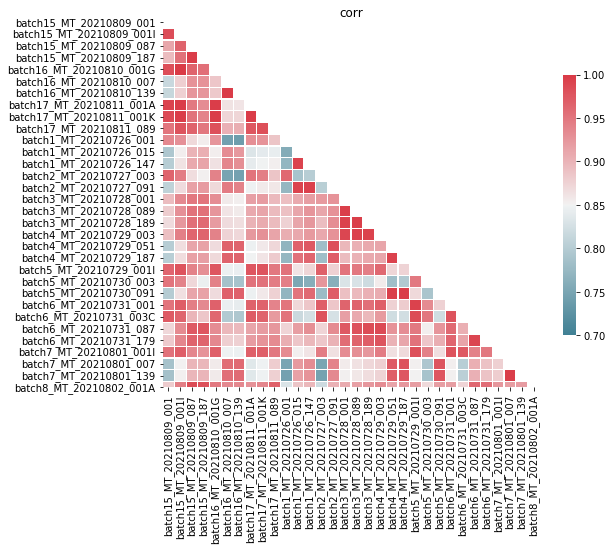

In [17]:
plot_corr_heatmap(snr3[wanted], figsize=(9,9), fname='snr3.pdf')

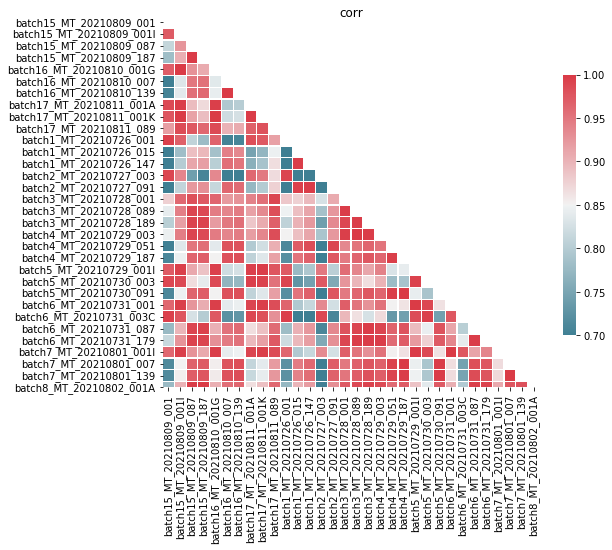

In [18]:
plot_corr_heatmap(medium[wanted], figsize=(9,9), fname='medium.pdf')

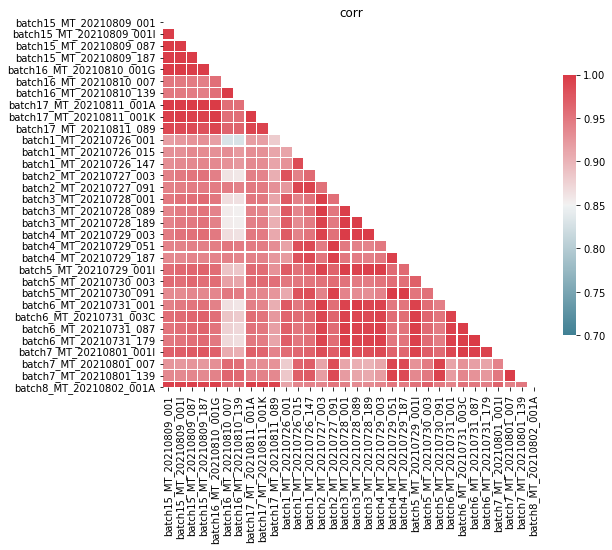

In [19]:
plot_corr_heatmap(top[wanted], figsize=(9,9), fname='top.pdf')

## Gauge CV of all Qstd samples

In [20]:
qList = open('list_Qstd.txt').read().split()
print(len(qList), qList[:5])

184 ['MT_20210726_001', 'MT_20210726_003', 'MT_20210726_005', 'MT_20210726_007', 'MT_20210726_009']


In [21]:
def trucate(x):
    return "_".join(x.split("_")[1:])

QQ = [
    x for x in fil_data.columns if trucate(x) in qList
]
print(len(QQ), QQ[:5])

184 ['batch11_MT_20210805_001', 'batch10_MT_20210804_001', 'batch10_MT_20210804_001A', 'batch10_MT_20210804_001E', 'batch10_MT_20210804_001I']


In [22]:
Qdata_top = top[QQ]
Qdata_top.shape

(1005, 184)

In [23]:
CV_top = []
for ii in range(Qdata_top.shape[0]):
    CV_top.append(Qdata_top.iloc[ii, :].std() / Qdata_top.iloc[ii, :].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
CV_med = []
med = medium[QQ]
for ii in range(med.shape[0]):
    CV_med.append(med.iloc[ii, :].std() / med.iloc[ii, :].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [25]:
sns.__version__

'0.11.2'

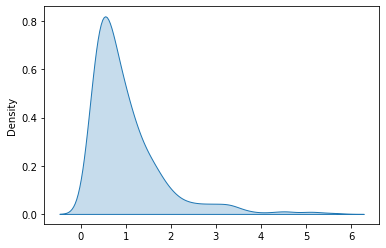

In [26]:
sns.kdeplot(data=[x for x in CV_med if x < 6],  fill=True)

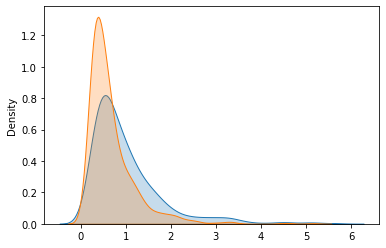

In [27]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=[x for x in CV_med if x < 6],  fill=True)
sns.kdeplot(data=[x for x in CV_top if x < 6],  fill=True)
plt.savefig("kde.pdf")